In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import scipy.stats as st

np.set_printoptions(linewidth=180)

In [2]:
dt = 0.05
tau = 1
sig = .05
# dX = -X/tau*dt + sig*dW
# dX = 1/tau*dt + sig*dW


T_max = 5
X = np.zeros((1,)) + 0
T = np.zeros((1,))
#k = 0
t = 0
seed = 5


In [3]:
%%time

np.random.seed(seed)
while t<T_max:
    t += dt
    X = np.append(X,(1-dt/tau)*X[-1]+sig*np.sqrt(dt)*np.random.randn())
    #X = np.append(X, X[-1]+ dt/tau +sig*np.random.randn())
    T = np.append(T,t)
    

CPU times: total: 0 ns
Wall time: 2.84 ms


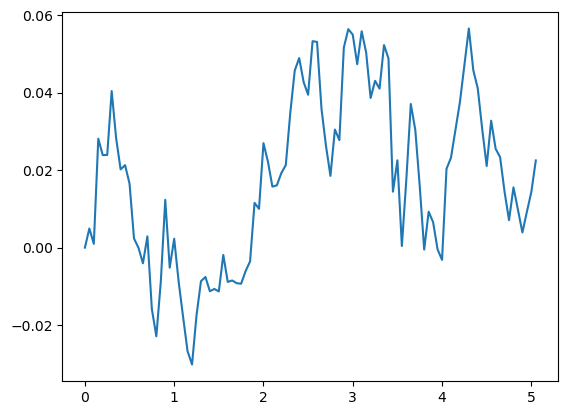

In [4]:
plt.plot(T,X)

$P_{t+1} = Q P_t$

$P(X_{t+1} \vert X_t)$

In [5]:
h = 0.005
X_states_space = np.arange(-0.1,0.1+h,h)
N = X_states_space.shape[0]
# approx 1
#diag = -sig**2/h**2 - np.abs(X_states_space)/h
#diag_inf = 0.5*sig**2/h**2 - np.maximum(X_states_space,0)/h
#diag_sup = 0.5*sig**2/h**2 - np.maximum(-X_states_space,0)/h

# approx 2
diag = -sig**2/h**2 + X_states_space*0 #- np.abs(X_states_space)/h
diag_inf = 0.5*sig**2/h**2 + X_states_space/tau/(2*h)
diag_sup = 0.5*sig**2/h**2 - X_states_space/tau/(2*h)


#h = 0.5*h
# approx 2
# diag = -sig**2/h**2 + X_states_space*0 #- np.abs(X_states_space)/h
# diag_inf = 0.5*sig**2/h**2 - 1/tau/(2*h) + X_states_space*0
# diag_sup = 0.5*sig**2/h**2 + 1/tau/(2*h) + X_states_space*0

Q = np.diag(diag)
Q += np.diag(diag_sup[:-1],1)
Q += np.diag(diag_inf[1:],-1)

Q[0,-1] = diag_inf[0]
Q[-1,0] = diag_sup[-1]

In [6]:
print(dt)
print(h**2)
print(sig)

#print(dt/h)

0.05
2.5e-05
0.05


In [12]:
M = np.zeros((N,1))
M[(N-1)//2] = 1
#M[6] = 1
X_markov_state = np.zeros((N,1))
X_markov_state[(N-1)//2] = 1
#X_markov_state[6] = 1
X_markov = np.zeros((1,)) + X[0]

t = 0
exp_dtQ = linalg.expm(dt*Q).T

In [13]:
np.random.seed(seed)
t = 0
while t<T_max:
    t += dt
    #print(t)
    M_ = exp_dtQ@X_markov_state[:,-1]
    
    #M_ = st.norm.pdf((X_states_space-X_markov[-1])/sig)
    #M_ /= M_.sum()
    M = np.append(M,M_[:,np.newaxis], axis=-1)

    draw_unif = st.norm.cdf(np.random.randn())
    draw_states = np.cumsum(draw_unif<np.cumsum(M_))==1
    X_markov_state = np.append(X_markov_state,draw_states[:,np.newaxis], axis=-1)
    X_markov = np.append(X_markov,X_states_space[np.bool_(draw_states)])

In [14]:
# plt.plot(np.cumsum(M_))
# plt.axhline(draw_unif)

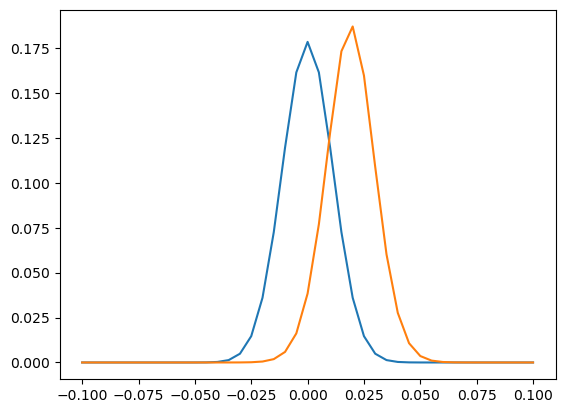

In [15]:
pdf_gauss = st.norm.pdf(X_states_space, scale=sig*np.sqrt(dt))*h
plt.plot(X_states_space, pdf_gauss)
plt.plot(X_states_space,M_)
#plt.plot(X_states_space,np.cumsum(M_))/pdf_gauss.max()/np.max(M_)

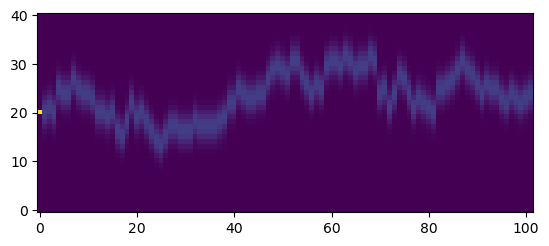

In [16]:
plt.imshow(M, origin='lower')

(-0.05, 0.07)

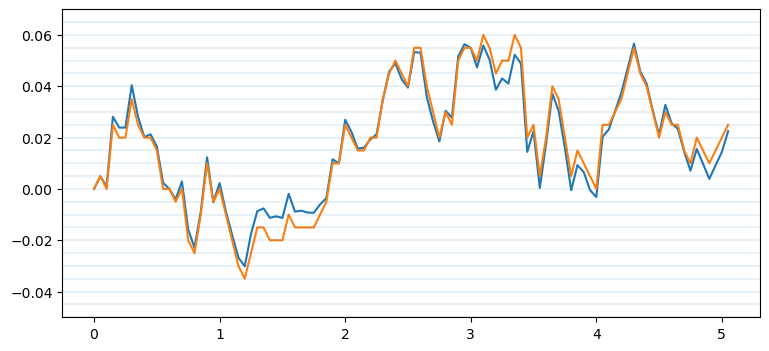

In [18]:
fig, ax = plt.subplots(1,1,figsize=(9,4))

ax.plot(T,X)
ax.plot(T,X_markov)

for i in range(N):
    ax.axhline(X_states_space[i], alpha=0.1)
#plt.plot(T,X_markov*5)

ax.set_ylim(-0.05,0.07)

In [209]:
linalg.expm(dt*Q)[8,:]

array([2.51074199e-12, 2.63244852e-10, 1.89746438e-08, 9.65737083e-07, 3.48340888e-05, 8.74844991e-04, 1.46032470e-02, 1.46346116e-01, 6.76279945e-01, 1.46346116e-01,
       1.46032470e-02, 8.74844991e-04, 3.48340888e-05, 9.65737083e-07, 1.89746438e-08, 2.63244852e-10, 2.51074199e-12])

In [210]:
M[:,1]

array([2.51074199e-12, 2.63244852e-10, 1.89746438e-08, 9.65737083e-07, 3.48340888e-05, 8.74844991e-04, 1.46032470e-02, 1.46346116e-01, 6.76279945e-01, 1.46346116e-01,
       1.46032470e-02, 8.74844991e-04, 3.48340888e-05, 9.65737083e-07, 1.89746438e-08, 2.63244852e-10, 2.51074199e-12])

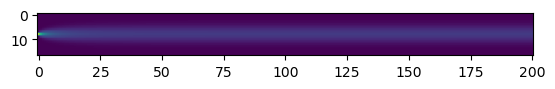

In [211]:
plt.imshow(M)

In [212]:
M.sum(0)

array([1.        , 1.        , 1.        , 1.        , 1.        , 0.99999999, 0.99999995, 0.99999985, 0.99999965, 0.99999927, 0.99999863, 0.99999764, 0.99999619, 0.99999418,
       0.99999151, 0.99998809, 0.99998384, 0.99997869, 0.9999726 , 0.99996552, 0.99995744, 0.99994833, 0.99993821, 0.99992708, 0.99991496, 0.99990188, 0.99988786, 0.99987294,
       0.99985716, 0.99984056, 0.99982319, 0.99980507, 0.99978626, 0.9997668 , 0.99974672, 0.99972607, 0.99970488, 0.99968319, 0.99966104, 0.99963845, 0.99961546, 0.9995921 ,
       0.99956838, 0.99954435, 0.99952003, 0.99949543, 0.99947057, 0.99944548, 0.99942018, 0.99939468, 0.99936899, 0.99934314, 0.99931713, 0.99929098, 0.9992647 , 0.99923829,
       0.99921177, 0.99918516, 0.99915844, 0.99913164, 0.99910477, 0.99907781, 0.99905079, 0.99902371, 0.99899658, 0.99896939, 0.99894215, 0.99891487, 0.99888755, 0.9988602 ,
       0.9988328 , 0.99880538, 0.99877793, 0.99875046, 0.99872296, 0.99869544, 0.99866789, 0.99864033, 0.99861276, 0.99858517

In [153]:
X_approx = np.copy(X)

for i in range(N):
    X_approx[(X_states_space[i+1]>X_approx)*(X_states_space[i]<X_approx)] = 0.5*(X_states_space[i]+X_states_space[i+1])

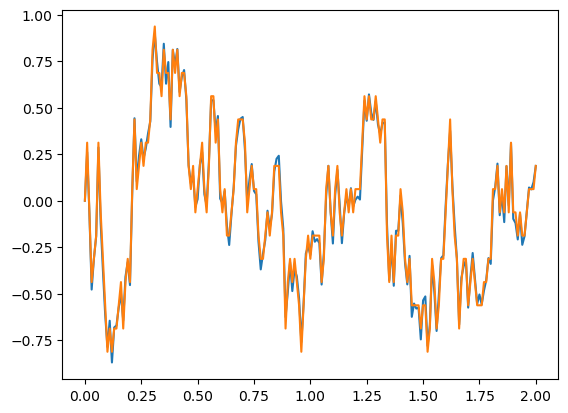

In [154]:
plt.plot(T,X)
plt.plot(T,X_approx)